In [216]:
!wget https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv

--2019-03-11 23:14:23--  https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv
Распознаётся www.dropbox.com (www.dropbox.com)… 162.125.70.1
Подключение к www.dropbox.com (www.dropbox.com)|162.125.70.1|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 301 Moved Permanently
Адрес: /s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv [переход]
--2019-03-11 23:14:24--  https://www.dropbox.com/s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv
Повторное использование соединения с www.dropbox.com:443.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://uca9e0637bf586808ef5667ce0cb.dl.dropboxusercontent.com/cd/0/inline/Ac4CNmAznWuiZowcNA0RjaU7jKlMOCp_zGSrkhvSf3c0wKTMPYhaNpFGTnY7JIAZAizKVTV6DRZMtQ82iD9NY5V43mFWSAKzG509M9E7FWTRRF00lboCpP5Z-2_i6Zt2lYc/file# [переход]
--2019-03-11 23:14:24--  https://uca9e0637bf586808ef5667ce0cb.dl.dropboxusercontent.com/cd/0/inline/Ac4CNmAznWuiZowcNA0RjaU7jKlMOCp_zGSrkhvSf3c0wKTMPYhaNpFGTnY7JIAZAizKVTV6DRZMtQ82iD9NY5V43m

In [219]:
import pandas as pd
df = pd.read_csv('vk_texts_with_sources.csv', usecols = ['text', 'source'])
df.head()

,text,source
0,Начальник Главного оперативного управления Ген...,mil
1,Артиллерийские подразделения общевойскового об...,mil
2,Подразделения морской пехоты Каспийской флотил...,mil
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil
4,На большом учебно-методическом командирском сб...,mil


## Задание 1
Посчитайте:
* количество текстов и количество классов
* количество слов (без лемматизации и с лемматизацией) в коллекции
* среднюю длину текста в словах и символах
* найдите 5 самых частых существительных в текстах каждого паблика 

*Рекомендуем использовать pandas для расчета описательных статистик.*

In [222]:
df = df.dropna()
df.count()

text      11526
source    11526
dtype: int64

In [223]:
n_texts = len(df) #кол-во текстов
n_categories = len(df.source.value_counts()) #кол-во классов
print(n_texts, n_categories)

11526 4


In [224]:
df.source.value_counts()

mchsgov        3024
mil            3017
mospolice      2854
russianpost    2631
Name: source, dtype: int64

In [225]:
#избавляемся от <br> в тексте
import re

for i in df.index:
    df.loc[i, "text"] = re.sub('<.*?>', ' ', str(df.text[i]))        

In [226]:
from string import punctuation
punct = punctuation+'«»—…“”*№–'

words = []
for text in df.text:
    text = text.split()
    for word in text:
        words.append(word.strip(punct))
words = [w.lower() for w in words if w]

wordcount = len(set(words)) #число уникальных слов без лемматизации
wordcount

84724

In [227]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [228]:
words_lemmatized = [morph.parse(w)[0].normal_form for w in words]

In [229]:
lemma_wordcount = len(set(words_lemmatized)) #число уникальных слов с лемматизацией
lemma_wordcount 

39128

In [230]:
import numpy as np

word_lists = [[w.strip(punct) for w in text.split() if w.strip(punct)] for text in df.text]
mean_words = np.mean([len(text) for text in word_lists]) #среднее число слов в тексте
mean_words

84.624067326045463

In [231]:
len(word_lists) == len(df.index)

True

In [232]:
symbol_lists = [[s for s in text] for text in df.text]
mean_symbols = np.mean([len(text) for text in symbol_lists]) #среднее число символов в тексте
mean_symbols

673.1597258372376

In [233]:
df.source.value_counts()

mchsgov        3024
mil            3017
mospolice      2854
russianpost    2631
Name: source, dtype: int64

Для нахождения 5 самых частотных сущствительных в каждом классе создадим словарь вида "класс-тексты этого класса" и напишем программу, которая посчитает 5 самых частотных существительных в каждом классе и запишет в словарь. 

In [234]:
classes = ['mchsgov', 'mil', 'mospolice', 'russianpost']
dictionary = {}
for i in classes:
    text = ' '.join(df.loc[df["source"]==i].text)
    dictionary[i] = text

In [235]:
from collections import Counter


def get_five_nouns(dictionary):
    most_common = {}
    for class_, text in dictionary.items():
        words = []
        text = text.split()
        for word in text:
            words.append(word.strip(punct))
        words = [w.lower() for w in words if w]
        nouns = [morph.parse(w)[0].normal_form for w in text if w and morph.parse(w)[0].tag.POS == 'NOUN'] 
        five_nouns = [n[0] for n in Counter(nouns).most_common(5)]
        most_common[class_] = five_nouns
    return most_common

In [236]:
nouns = get_five_nouns(dictionary) 

In [237]:
nouns #5 самых частых существительных в текстах каждого паблика

{'mchsgov': ['#мчс', '#мчсроссия', 'мчс', 'россия', 'спасатель'],
 'mil': ['#минобороны', 'военный', 'россия', 'год', 'оборона'],
 'mospolice': ['россия', 'мвд', 'москва', 'полиция', 'сотрудник'],
 'russianpost': ['почта', 'россия', 'год', 'отделение', '#почтароссия']}

In [238]:
#для последующих заданий лемматизируем word_lists и добавим их в датафрейм
# word_lists = [[w.strip(punct) for w in text.split() if w.strip(punct)] for text in df.text]
lemmas_list = []
for list_ in word_lists:
    lemmas = [morph.parse(w)[0].normal_form for w in list_]
    lemmas_list.append(lemmas)

In [239]:
df.insert(loc = 2, column = 'lemmas', value = lemmas_list)
df.head()

,text,source,lemmas
0,Начальник Главного оперативного управления Ген...,mil,"[начальник, главный, оперативный, управление, ..."
1,Артиллерийские подразделения общевойскового об...,mil,"[артиллерийский, подразделение, общевойсковой,..."
2,Подразделения морской пехоты Каспийской флотил...,mil,"[подразделение, морской, пехота, каспийский, ф..."
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil,"[команда, на, всеармейский, этап, конкурс, арм..."
4,На большом учебно-методическом командирском сб...,mil,"[на, большой, учебно-методический, командирски..."


Разделим коллекцию текстов на обучающую и тестовую части. 

In [240]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

data = shuffle(df)

train, test = train_test_split(data, test_size=0.1)

## Задание 2. Классификация по правилам

### 1. Потестируем первый правиловый классификатор

In [241]:
import random

def rule_classifier1(text):
    if 'мчс' in text:
        return 'mchsgov'
    elif 'оборона' in text:
        return 'mil'
    elif 'мвд' in text:
        return 'mospolice'
    elif 'почта' in text:
        return'russianpost'
    elif '#мчс' in text:
        return 'mchsgov'
    elif '#мчсроссия' in text:
        return 'mchsgov'
    elif 'полиция' in text:
        return 'mospolice'
    elif 'отделение' in text:
        return 'russianpost'
    else:
        return random.choice(['mchsgov', 'mospolice', 'russianpost', 'mil']) 
    #использем random.choice для определения класса текстов, в которых нет слов из правил

In [242]:
predictions = []
for text in test.lemmas:
    class_ = rule_classifier1(text)
    if class_ == None:
        predictions.append('')
    else:
        predictions.append(class_)
print(predictions[:20])

['mospolice', 'mchsgov', 'mospolice', 'mospolice', 'mospolice', 'mchsgov', 'mchsgov', 'mospolice', 'mchsgov', 'mospolice', 'mospolice', 'mospolice', 'russianpost', 'russianpost', 'mospolice', 'mchsgov', 'russianpost', 'mchsgov', 'mospolice', 'mospolice']


In [243]:
predictions_array = np.asarray(predictions)

In [244]:
from sklearn.metrics import *
def evaluate(right_classes, predicted_classes):
    # макро-усреднение
    print("Precision: {0:6.2f}".format(precision_score(right_classes, predicted_classes, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(right_classes, predicted_classes, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(right_classes, predicted_classes, average='macro')))

    print("...")
    # микро-усреднение
    print("Precision: {0:6.2f}".format(precision_score(right_classes, predicted_classes, average='micro')))
    print("Recall: {0:6.2f}".format(recall_score(right_classes, predicted_classes, average='micro')))
    print("F1-measure: {0:6.2f}".format(f1_score(right_classes, predicted_classes, average='micro')))

    print("...")
    # accuracy
    print("Accuracy: {0:6.2f}".format(accuracy_score(right_classes, predicted_classes)))

In [245]:
evaluate(test.source, predictions_array)

Precision:   0.69
Recall:   0.70
F1-measure:   0.67
...
Precision:   0.70
Recall:   0.70
F1-measure:   0.70
...
Accuracy:   0.70


In [246]:
print(classification_report(test.source, predictions_array)) 

             precision    recall  f1-score   support

    mchsgov       0.73      0.83      0.78       297
        mil       0.70      0.29      0.41       303
  mospolice       0.75      0.97      0.85       322
russianpost       0.60      0.71      0.65       231

avg / total       0.70      0.70      0.67      1153



### 2. Потестируем второй классификатор, в котором класс определяется максимальным пересечением множеств слов текста и 5 самых частотных существительных класса

In [247]:
def rule_classifier2(text, nouns):
    text = set(text)
    overlaps = []
    for class_, words in nouns.items():
        overlap = text & set(words)
        overlaps.append(tuple([class_, overlap]))
    
    max_overlap = 0
    for overlap in overlaps:
        if len(overlap[1]) > max_overlap:
            max_overlap = len(overlap[1])
    
    for overlap in overlaps:
        if max_overlap == len(overlap[1]):
            return(overlap[0])

In [248]:
predictions2 = []
for text in test.lemmas:
    class_ = rule_classifier2(text, nouns)
    predictions2.append(class_)
predictions2[:20]

['mospolice',
 'mil',
 'mospolice',
 'mospolice',
 'mospolice',
 'mchsgov',
 'mchsgov',
 'mospolice',
 'mchsgov',
 'mospolice',
 'mospolice',
 'mospolice',
 'russianpost',
 'mospolice',
 'mospolice',
 'mchsgov',
 'mil',
 'mchsgov',
 'mospolice',
 'mil']

In [249]:
predictions_array2 = np.asarray(predictions2)
evaluate(test.source, predictions_array2)

Precision:   0.78
Recall:   0.72
F1-measure:   0.72
...
Precision:   0.73
Recall:   0.73
F1-measure:   0.73
...
Accuracy:   0.73


In [250]:
print(classification_report(test.source, predictions_array2)) 

             precision    recall  f1-score   support

    mchsgov       0.56      0.93      0.70       297
        mil       0.70      0.44      0.54       303
  mospolice       0.93      0.97      0.95       322
russianpost       0.95      0.54      0.69       231

avg / total       0.78      0.73      0.72      1153



Как видно из результатов, мы не смогли придумать правило, которое никогда не ошибается.  

## Задание 3. Baseline
Используйте стандартный ```sklearn.pipeline``` для классификации текстов: 
* векторизация 
* $tf-idf$ взвешивание 
* ваш любимый метод классификации.


### 1. Попробуем мультиномиальный Байес 

In [251]:
test.text.head()

10206    Неотъемлемой частью поздравительной программы ...
1771     11 января 1957 года принято решение о создании...
9026     НАЙДЕНА, ЖИВА. _______________________________...
10585    Доброе утро! Хорошего дня и успешной рабочей н...
9185     Желаем вам хороших и законопослушных выходных!...
Name: text, dtype: object

In [252]:
from sklearn.feature_extraction.text import *
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
classifier = MultinomialNB()

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('clf', classifier)
])
%time clf.fit(train.text, train.source)

CPU times: user 5.08 s, sys: 361 ms, total: 5.44 s
Wall time: 5.62 s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [253]:
predictions3 = clf.predict(test.text)
evaluate(test.source, predictions3)

Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Accuracy:   0.97


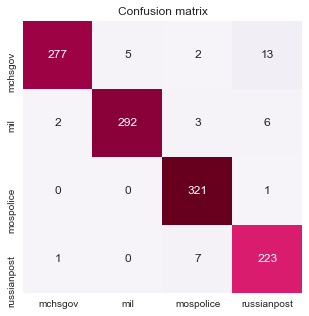

             precision    recall  f1-score   support

    mchsgov       0.99      0.93      0.96       297
        mil       0.98      0.96      0.97       303
  mospolice       0.96      1.00      0.98       322
russianpost       0.92      0.97      0.94       231

avg / total       0.97      0.97      0.97      1153



In [261]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

m = confusion_matrix(test.source, predictions3)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuRd")
plt.title("Confusion matrix")
plt.show()

print(classification_report(test.source, predictions3)) 

Мультиномиальный байес сработал неплохо. Попробуем другие:

In [255]:
vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
classifier = LogisticRegression() #пробуем логистическую регрессию

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('clf', classifier)
])

%time clf.fit(train.text, train.source)

CPU times: user 11.4 s, sys: 511 ms, total: 11.9 s
Wall time: 9.37 s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Precision:   0.96
Recall:   0.97
F1-measure:   0.96
...
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Accuracy:   0.97


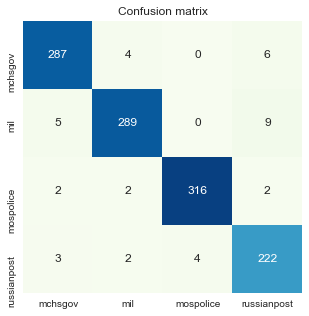

             precision    recall  f1-score   support

    mchsgov       0.97      0.97      0.97       297
        mil       0.97      0.95      0.96       303
  mospolice       0.99      0.98      0.98       322
russianpost       0.93      0.96      0.94       231

avg / total       0.97      0.97      0.97      1153



In [259]:
predictions4 = clf.predict(test.text)
evaluate(test.source, predictions4)

m = confusion_matrix(test.source, predictions4)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="GnBu")
plt.title("Confusion matrix")
plt.show()

print(classification_report(test.source, predictions4)) 

In [257]:
vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
classifier = RandomForestClassifier() #пробуем случайный лес

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('clf', classifier)
])

%time clf.fit(train.text, train.source)

CPU times: user 19.5 s, sys: 361 ms, total: 19.8 s
Wall time: 20 s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

Precision:   0.96
Recall:   0.97
F1-measure:   0.96
...
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Accuracy:   0.97


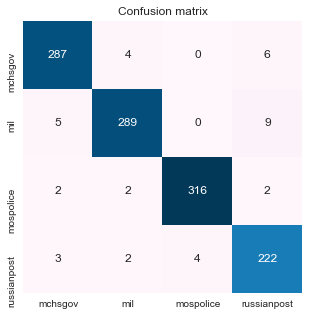

             precision    recall  f1-score   support

    mchsgov       0.97      0.97      0.97       297
        mil       0.97      0.95      0.96       303
  mospolice       0.99      0.98      0.98       322
russianpost       0.93      0.96      0.94       231

avg / total       0.97      0.97      0.97      1153



In [260]:
predictions5 = clf.predict(test.text)
evaluate(test.source, predictions5)

m = confusion_matrix(test.source, predictions5)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()
print(classification_report(test.source, predictions5)) 

Основное наблюдение - многие классификаторы не до конца могут провести различия между Почтой России и МЧС.
### Как мы видим, F-меру 0.97 показали все использованные классификаторы. Возьмем ее за бейзлайн. 

## Задание 4. Снижение размерности
Добавим в ```sklearn.pipeline```  методы снижения размерности: LSI (TruncatedSVD) и LDA. 

Какие методы классификации разумно использовать после снижения размерности? 

После снижения размерности методом LSA мы можем использовать те классификаторы, которые принимают на вход в качестве X и положительные, и отрицательные значения, например логистическую регрессию или случайный лес. Если мы будем использовать вероятностные методы снижения размерности, то область определения классификатора должна быть от 0 до 1 - можем попробовать наивный Байесовский классификатор.

In [262]:
from sklearn.decomposition import TruncatedSVD

vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
svd = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
classifier = LogisticRegression() 

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('svd', svd),
    ('clf', classifier)
])

%time clf.fit(train.text, train.source)

CPU times: user 36.7 s, sys: 14.9 s, total: 51.6 s
Wall time: 48.9 s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Precision:   0.95
Recall:   0.95
F1-measure:   0.95
...
Precision:   0.95
Recall:   0.95
F1-measure:   0.95
...
Accuracy:   0.95


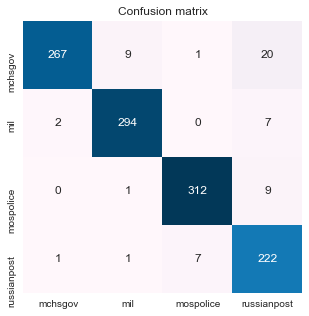

In [263]:
predictions6 = clf.predict(test.text)
evaluate(test.source, predictions6)

m = confusion_matrix(test.source, predictions6)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

После снижения размерности F-мера не улучшилась. Пробуем вместо логистической регрессии случайный лес.  

CPU times: user 37.1 s, sys: 17 s, total: 54.1 s
Wall time: 54.5 s
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Accuracy:   0.97


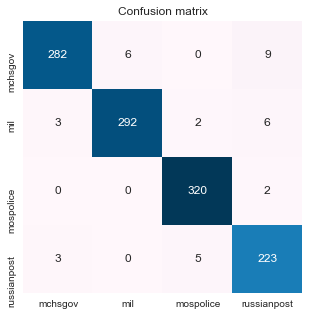

In [264]:
vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
svd = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
classifier = RandomForestClassifier() 

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('svd', svd),
    ('clf', classifier)
])

%time clf.fit(train.text, train.source)
predictions7 = clf.predict(test.text)
evaluate(test.source, predictions7)

m = confusion_matrix(test.source, predictions7)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

С LSA и случайным лесом мы остались на baseline 0.97. Теперь попробуем вероятностную LDA + мультиномиальный Байес.

In [265]:
from sklearn.decomposition import LatentDirichletAllocation
import warnings
warnings.filterwarnings('ignore')

In [266]:
vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
lda = LatentDirichletAllocation(n_components=10, max_iter = 5) #возьмем 10 тем
classifier = MultinomialNB() 

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('lda', lda),
    ('clf', classifier)
])

%time clf.fit(train.text, train.source)

CPU times: user 1min 59s, sys: 8.87 s, total: 2min 8s
Wall time: 2min 10s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...samples=1000000.0, verbose=0)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Precision:   0.77
Recall:   0.60
F1-measure:   0.60
...
Precision:   0.60
Recall:   0.60
F1-measure:   0.60
...
Accuracy:   0.60


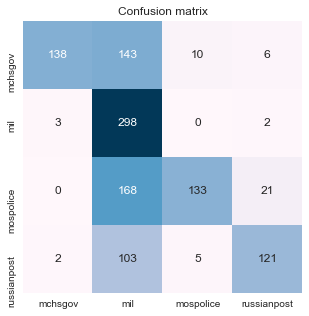

In [267]:
predictions8 = clf.predict(test.text)
evaluate(test.source, predictions8)

m = confusion_matrix(test.source, predictions8)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

Получилось еще хуже: теперь распознаются неправильно не только классы МЧС и Почты России, но и московской полиции. 

## Задание 5. Лемматизация

Проверим, как изменятся результаты в случае варианта: TruncatedSVD + Random Forest Classifier 

In [268]:
train_set = [' '.join(text) for text in train.lemmas]
test_set = [' '.join(text) for text in test.lemmas]

CPU times: user 27.6 s, sys: 7.47 s, total: 35.1 s
Wall time: 30.1 s
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Accuracy:   0.97


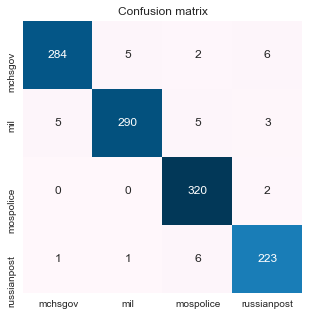

In [269]:
vectorizer = CountVectorizer(ngram_range=(1,2)) #используем на униграммах и биграммах
tfidf = TfidfTransformer()
svd = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=5)
classifier = RandomForestClassifier() 

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('svd', svd),
    ('clf', classifier)
])


%time clf.fit(train_set, train.source) #используем на лемматизированных текстах
predictions10 = clf.predict(test_set)
evaluate(test.source, predictions10)

m = confusion_matrix(test.source, predictions10)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

Baseline остался тот же. 

Попробуем просто на словах: 

CPU times: user 5.07 s, sys: 256 ms, total: 5.32 s
Wall time: 4.37 s
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Accuracy:   0.97


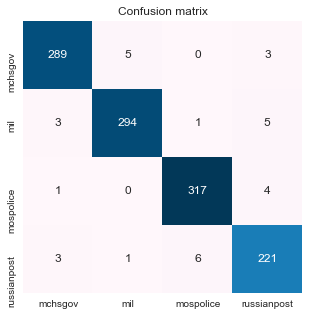

In [270]:
vectorizer = CountVectorizer(ngram_range=(1,1)) #возьмем просто слова
tfidf = TfidfTransformer()
svd = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
classifier = RandomForestClassifier() 

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('svd', svd),
    ('clf', classifier)
])


%time clf.fit(train_set, train.source) #используем на лемматизированных текстах
predictions11 = clf.predict(test_set)
evaluate(test.source, predictions11)

m = confusion_matrix(test.source, predictions11)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

Ничего не поменялось. 

## Задание 6. Модель скрытых тем
Построим скрытую модель LDA по данной коллекции текстов. 

Здесь не нужно разделять корпус на тестовую и обучающую части, поскольку темы выявляются во всем датасете. 

Модель скрытых тем позволяет увидеть, почему тот или иной класс распознается классификаторами плохо. Темы - это наборы слов, наиболее характерные для того или иного класса (ключевые слова в своем роде). Мы можем видеть, у каких слов больший вес в том или ином классе и предполагать, почему некоторым текстам присваивается иной класс: например, потому что там нет слов, характерных для того или иного класса. Также через модель скрытых тем можно посмотреть, что еще сделать с текстами, чтобы они лучше классифицировались: например, какие еще стоп-слова можно выбросить.  

Сначала предобработаем текст: уберем стоп-слова и т.д.  

In [271]:
import re
from nltk.corpus import stopwords
regex = re.compile("[А-Яа-я]+")

mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д', 'г']
mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой', 'год', 'время', 'день', 'весь']

from pymystem3 import Mystem

m = Mystem()

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))

def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "
    
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

In [272]:
df.text = df.text.apply(lemmatize)
df.text = df.text.str.lower()
df.text = df.text.apply(words_only)
df.text = df.text.apply(remove_stopwords)  
df.text = df.text.apply(remove_stoplemmas)

Представляем данные в Gensim словарем и корпусом:

In [276]:
from gensim.corpora import *
texts = [df.text.iloc[i].split() for i in range(len(df))]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [277]:
print(dictionary)

Dictionary(28119 unique tokens: ['абу', 'автомобильный', 'агентство', 'адский', 'аккара']...)


In [280]:
from gensim.models import LdaModel

Тестируем LDA.

In [282]:
%%time
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=4,
                        alpha='auto', eta='auto', iterations = 10, passes = 5)

CPU times: user 18.7 s, sys: 241 ms, total: 18.9 s
Wall time: 19.2 s


In [283]:
lda.show_topics(4)

[(0,
  '0.013*"ребенок" + 0.012*"мчс" + 0.011*"россия" + 0.007*"человек" + 0.007*"письмо" + 0.006*"мчсроссия" + 0.006*"отделение" + 0.005*"дом" + 0.005*"акция" + 0.004*"почта"'),
 (1,
  '0.018*"россия" + 0.014*"почтовый" + 0.011*"почта" + 0.008*"марка" + 0.006*"российский" + 0.006*"конкурс" + 0.005*"открытка" + 0.005*"страна" + 0.005*"первый" + 0.005*"участие"'),
 (2,
  '0.031*"полиция" + 0.031*"мвд" + 0.022*"москва" + 0.017*"россия" + 0.016*"сотрудник" + 0.015*"петровка" + 0.011*"гу" + 0.009*"задерживать" + 0.009*"увд" + 0.009*"полицейский"'),
 (3,
  '0.008*"отправление" + 0.007*"почта" + 0.007*"россия" + 0.006*"почтовый" + 0.006*"услуга" + 0.006*"доставка" + 0.005*"посылка" + 0.005*"центр" + 0.004*"минобороны" + 0.004*"учение"')]

Наши классы немножко смешались, особенно Почта России и Минобороны. Визуализируем:

In [284]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

## Задание 7. Continious bag of words

Представим тексты в виде усреднённых векторов слов, классифицируем тексты при помощи логистической регрессии и проанализируем результаты.

Для получения векторов загрузим векторную модель, без тэгов.

In [285]:
import gensim
from gensim.models import KeyedVectors

model = gensim.models.KeyedVectors.load('/Users/anyway/Downloads/araneum_none_fasttextcbow_300_5_2018/araneum_none_fasttextcbow_300_5_2018.model')

Получим и усредним вектора слов, входящих в текст, при помощи функции get_matrix, и получим в качестве текстов матрицу из усреднённых векторов.

In [286]:
def get_matrix(text, model):
    vector = np.zeros(shape=model.vector_size)
    counter = 0
    for word in text:
        if word in model.vocab: 
            try:
                vector = np.add(vector, model[word])
                counter += 1
            except KeyError:
                pass
    if counter == 0:
        return vector.squeeze()
    return (vector / counter).squeeze() # убираем одномерные векторы при помощи функции .squeeze()

In [287]:
test.text.head()

10206    Неотъемлемой частью поздравительной программы ...
1771     11 января 1957 года принято решение о создании...
9026     НАЙДЕНА, ЖИВА. _______________________________...
10585    Доброе утро! Хорошего дня и успешной рабочей н...
9185     Желаем вам хороших и законопослушных выходных!...
Name: text, dtype: object

In [288]:
#давайте лемматизируем и обработаем трейн и тест отдельно

test.text = test.text.apply(lemmatize)
test.text = test.text.str.lower()
test.text = test.text.apply(words_only)
test.text = test.text.apply(remove_stopwords)  
test.text = test.text.apply(remove_stoplemmas)

train.text = train.text.apply(lemmatize)
train.text = train.text.str.lower()
train.text = train.text.apply(words_only)
train.text = train.text.apply(remove_stopwords)  
train.text = train.text.apply(remove_stoplemmas)

In [289]:
# теперь получим эмбеддинги слов для трейн- 
# и тест-сета (уже предварительно лемматизированных на предыдущем шаге):
train_vectors = [get_matrix(text.split(), model) for text in train.text]
test_vectors = [get_matrix(text.split(), model) for text in test.text]

In [290]:
# используем логистическую регрессию для проверки метода
from sklearn.linear_model import LogisticRegression 

clf = LogisticRegression(C=1)
clf.fit(train_vectors, train.source)
predictions12 = clf.predict(test_vectors)
evaluate(test.source, predictions12)

Precision:   0.94
Recall:   0.95
F1-measure:   0.94
...
Precision:   0.95
Recall:   0.95
F1-measure:   0.95
...
Accuracy:   0.95


/Users/anyway/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/anyway/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


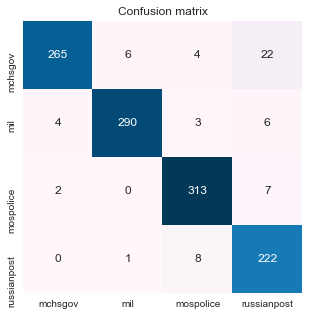

In [291]:
m = confusion_matrix(test.source, predictions12)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

Как всегда, больше проблем с классом МЧС. Пока результаты так себе. 

### Теперь наложим на усредненные вектора текстов tf-idf-веса и снова используем логистическую регрессию. Визуализируем результаты.

In [297]:
from sklearn.feature_extraction.text import *

tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)

train_tfidf = tfidf.fit_transform(train_vectors)
test_tfidf = tfidf.fit_transform(test_vectors)

clf = LogisticRegression(C=1)
clf.fit(train_tfidf, train.source)
preds13 = clf.predict(test_tfidf)
evaluate(test.source, preds13)

Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Accuracy:   0.96


/Users/anyway/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/anyway/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


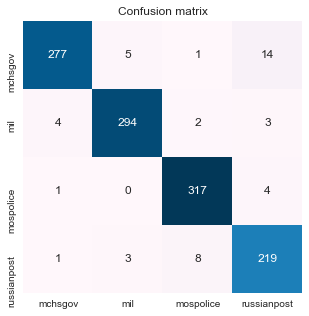

In [298]:
m = confusion_matrix(test.source, preds13)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

С tf-idf бейзлайн не побит, но всё равно довольно неплохо. 

### Теперь используем модель эмбеддингов документов doc2vec

In [299]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

train_docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(train.text)]
test_docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(test.text)]

model = Doc2Vec(train_docs, 
                vector_size=100,
                epochs=40)

In [300]:
len(train_docs)

10373

In [302]:
train_vectors = [] # извлекаем вектора текстов тренировочного сета из модели
for i in range(10373):
    train_vectors.append(model.docvecs[i])

In [303]:
test_vectors = [] # извлекаем из той же модели вектора тест-сета
for text in test.text:
    test_vectors.append(model.infer_vector(text.split()))

In [306]:
test_vectors[115]

array([-0.00330081,  0.00155571,  0.00397036,  0.00128181,  0.00136164,
        0.00155671, -0.00267304, -0.00196101,  0.00091012, -0.00175011,
       -0.0010904 , -0.0045861 ,  0.00449215,  0.00193505,  0.00456745,
        0.00394565,  0.00480944,  0.00245285, -0.00082997,  0.00230993,
        0.00448378, -0.00019809, -0.0023149 , -0.00208668, -0.00272517,
        0.00387218,  0.00071818,  0.0041687 ,  0.00396137, -0.00226743,
        0.00220841, -0.00362722, -0.00055984, -0.00181088,  0.00157215,
       -0.00096851, -0.00357092, -0.00236132, -0.00466207,  0.00251252,
       -0.00342512, -0.0037382 , -0.00117547, -0.00118941, -0.00230681,
        0.00466946,  0.00468331, -0.00297088,  0.00022848, -0.00011053,
       -0.00452881,  0.00416702, -0.00413488, -0.00143066, -0.00465467,
       -0.0047137 , -0.00141478,  0.00466114, -0.0007933 , -0.00273398,
        0.00025676, -0.00032365, -0.00148142, -0.00350913, -0.00131097,
       -0.00437459, -0.00142193,  0.00229321, -0.00188515, -0.00

Попробуем случайный лес (в нем результаты получаются сбалансированнее, чем при логистической регрессии). 

Precision:   0.27
Recall:   0.24
F1-measure:   0.11
...
Precision:   0.26
Recall:   0.26
F1-measure:   0.26
...
Accuracy:   0.26


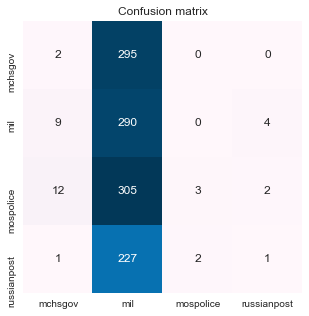

In [328]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_vectors, train.source)
predictions14 = clf.predict(test_vectors)
evaluate(test.source, predictions14)

m = confusion_matrix(test.source, predictions14)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

Как видно из матрицы ошибок, этот метод сработал плохо, если мы правильно его применили. Почему-то доминирует 1 класс. 

In [329]:
print(classification_report(test.source, predictions14))

             precision    recall  f1-score   support

    mchsgov       0.08      0.01      0.01       297
        mil       0.26      0.96      0.41       303
  mospolice       0.60      0.01      0.02       322
russianpost       0.14      0.00      0.01       231

avg / total       0.29      0.26      0.12      1153



Странно. 


Так или иначе, этими методами побить бейзлайн не удалось. 

## Задание 8
Используем ```fastText``` в режиме классификации. Возьмем лемматизированный текст. 

In [330]:
import fasttext

In [331]:
with open('data.train.txt', 'w', encoding = 'UTF-8') as f:
    for i in train.index:
        text = str(train.text[i])
        label = str(train.source[i])
        f.write(text + ' ' + '__label__' + label + '\n')

In [332]:
classifier = fasttext.supervised('data.train.txt', 'model1', label_prefix='__label__')

In [333]:
result = classifier.predict([i for i in test.text if i]) 

1153

In [335]:
evaluate(test.source, result)

Precision:   0.98
Recall:   0.98
F1-measure:   0.98
...
Precision:   0.98
Recall:   0.98
F1-measure:   0.98
...
Accuracy:   0.98


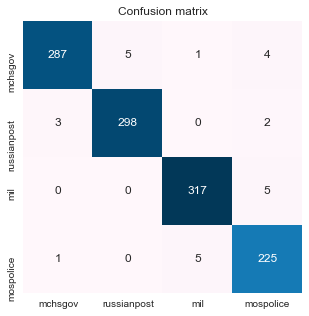

In [337]:
m = confusion_matrix(test.source, result)

labels = ['mchsgov', 'russianpost', 'mil', 'mospolice']
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

### FastText показал лучший результат! 

# Заключение

Сложно сказать, какой метод нам показался лучше - многие классификаторы были на уровне baseline. Во время экспериментов в зависимости от выборки baseline был 0.96, и лучше всех о себе тогда заявил метод TruncatedSVD + Random Forest Classifier + лемматизация (F1 = 0.98), но, к сожалению, тестовая выборка поменялась, и те результаты не сохранились. Думаю, для этого датасета мы бы выбрали это сочетание методов или FastText. 

Задание выполнено Николаевой Анной и Катричевой Надеждой. 